In [1]:
#import dependencies 
import pandas as pd
import requests 
import random
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy

#import 
from config import api_key

#create output data file
output_data_file = "output_data/cities.csv"

In [2]:
# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, long)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record += 1
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found.')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | placido de castro
Processing Record 2 | beringovskiy
Processing Record 3 | haines junction
Processing Record 4 | busselton
Processing Record 5 | cabo san lucas
Processing Record 6 | hermanus
Processing Record 7 | jamestown
Processing Record 8 | gat
Processing Record 9 | nichinan
City not found.
City not found.
Processing Record 10 | san cristobal
Processing Record 11 | yenagoa
Processing Record 12 | albany
Processing Record 13 | marsa matruh
Processing Record 14 | hobyo
Processing Record 15 | salinopolis
Processing Record 16 | bonthe
City not found.
Processing Record 17 | port alfred
Processing Record 18 | rikitea
Processing Record 19 | georgetown
Processing Record 20 | ancud
Processing Record 21 | tasiilaq
Processing Record 22 | cayenne
Processing Record 23 | hasaki
Processing Record 24 | chuy
Processing Record 25 | conceicao do araguaia
Processing Record 26 | mar del plata
Processing Record 27 | antalaha
Process

Processing Record 237 | hualmay
Processing Record 238 | richards bay
Processing Record 239 | ayame
Processing Record 240 | freeport
Processing Record 241 | muzhi
Processing Record 242 | pak phanang
Processing Record 243 | camana
Processing Record 244 | diego de almagro
Processing Record 245 | benghazi
Processing Record 246 | santa rosa
Processing Record 247 | terrace
Processing Record 248 | fene
Processing Record 249 | victoria
Processing Record 250 | bonanza
Processing Record 251 | vieux fort
Processing Record 252 | el ejido
Processing Record 253 | sabinov
Processing Record 254 | bratsk
Processing Record 255 | sangar
Processing Record 256 | nanortalik
Processing Record 257 | nizhniy kuranakh
Processing Record 258 | mezhdurechensk
Processing Record 259 | half moon bay
Processing Record 260 | bonavista
Processing Record 261 | patea
Processing Record 262 | raudeberg
Processing Record 263 | port lincoln
Processing Record 264 | severo-kurilsk
City not found.
City not found.
Processing Reco

Processing Record 473 | uttarkashi
Processing Record 474 | filadelfia
Processing Record 475 | talara
Processing Record 476 | olyka
Processing Record 477 | delvine
Processing Record 478 | buchanan
Processing Record 479 | pinega
Processing Record 480 | nelson bay
Processing Record 481 | mayumba
Processing Record 482 | carballo
Processing Record 483 | damghan
Processing Record 484 | piterka
City not found.
Processing Record 485 | bogovarovo
Processing Record 486 | zhezkazgan
Processing Record 487 | jinchang
Processing Record 488 | johi
Processing Record 489 | necochea
Processing Record 490 | fiumicino
City not found.
Processing Record 491 | traverse city
Processing Record 492 | zhigansk
Processing Record 493 | mazamet
Processing Record 494 | naze
Processing Record 495 | mattru
Processing Record 496 | borovoy
Processing Record 497 | skibbereen
Processing Record 498 | toda raisingh
Processing Record 499 | usinsk
Processing Record 500 | mangrol
City not found.
Processing Record 501 | chicama

In [4]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
weather_df = pd.DataFrame(weatherdata)
#output to csv
weather_df.to_csv('weatherdata.csv')

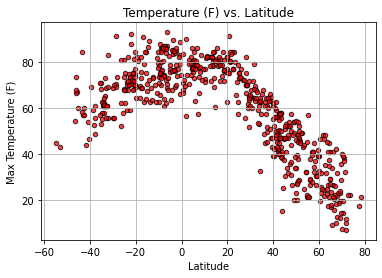

In [8]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(weather_df['Lat'], weather_df['Max Temperature'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('Temperature (F) vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')
plt.show()

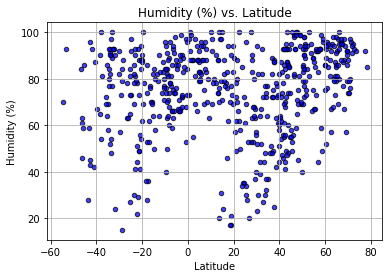

In [10]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Humidity_vs_Lat.png')

plt.show()

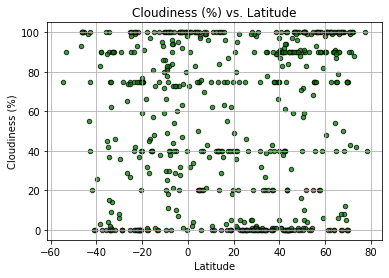

In [11]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Cloudiness_vs_Lat.png')
plt.show()

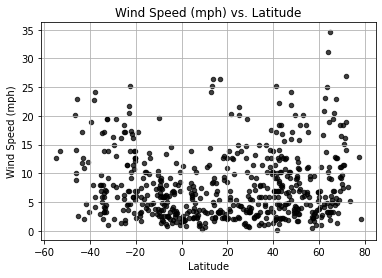

In [12]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', s=20, c='black', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Windspeed_vs_Lat.png')
plt.show()

In [38]:
#import additional dependencies

from scipy.stats import linregress
from pprint import pprint

In [39]:
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [44]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"fig{ifig}.png")
    plt.show()

The r-squared is: -0.8912724612276723


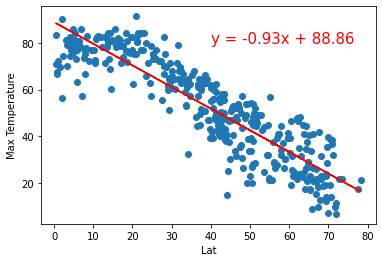

In [73]:
# Northern Hemisphere - Temperature (F) vs. Latitude

xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (40,80)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: 0.6216531525483504


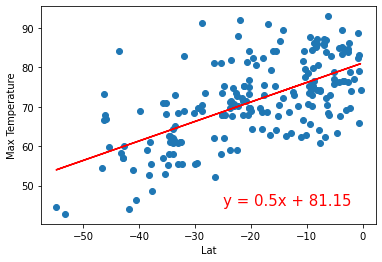

In [90]:
# Southern Hemisphere - Temperature (F) vs. Latitude

xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (-25,45)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

The r-squared is: 0.18827394133042763


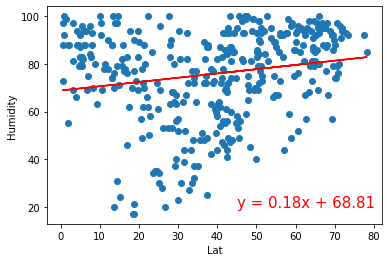

In [91]:
# Northern Hemisphere - Humidity (%) vs. Latitude

xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,20)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.12201424153412448


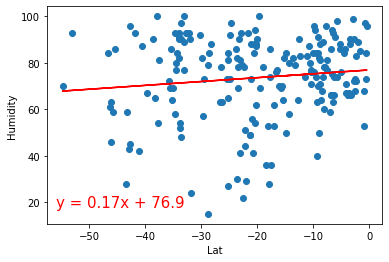

In [93]:
# Southern Hemisphere - Humidity (%) vs. Latitude

xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-56,18)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.17332243260405744


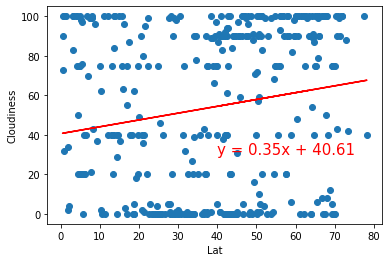

In [96]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (40,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: 0.09203834681654961


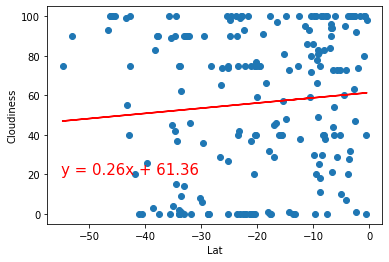

In [97]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,20)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: 0.21557785622791534


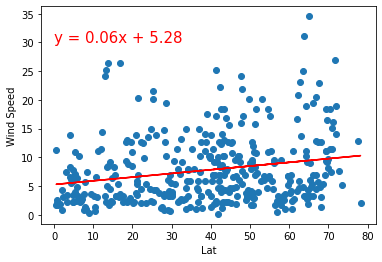

In [67]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

The r-squared is: -0.37289311777408507


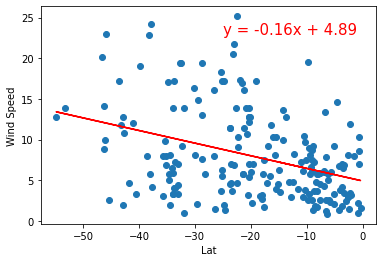

In [100]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,23)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)